In [3]:
from google.colab import files
upload_files = files.upload()

Saving package - Sheet1.csv to package - Sheet1.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('package - Sheet1.csv')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


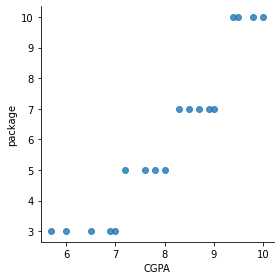

In [8]:
sns.lmplot("CGPA", "package", data = df, fit_reg = False, size = 4)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[["CGPA", "package"]])
scaled_df[0:5]

array([[-1.85847189, -1.21624228],
       [-1.62065795, -1.21624228],
       [-0.90721614, -1.21624228],
       [-1.22430139, -1.21624228],
       [-0.82794482, -1.21624228]])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


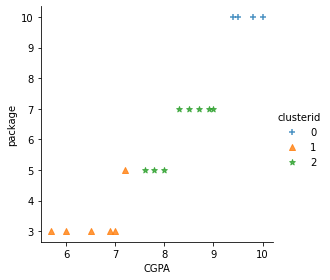

In [11]:
from sklearn.cluster import KMeans
clusters = KMeans(3)
clusters.fit(scaled_df)
df["clusterid"] = clusters.labels_
markers = ['+', '^', '*']
sns.lmplot("CGPA", "package", data = df, hue = "clusterid", fit_reg = False, markers  = markers, size = 4)

In [ ]:
clusters = KMeans(3)
clusters.fit(df)
df["new_clusterid"] = clusters.labels_
df.groupby("new_clusterid")['CGPA', 'package'].agg(["mean", 'std']).reset_index()

Text(0, 0.5, 'Sum of Squared Error')

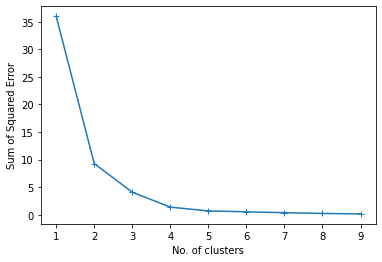

In [13]:
cluster_range = range(1,10)
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters)
  clusters.fit(scaled_df)
  cluster_errors.append(clusters.inertia_)
plt.figure(figsize = (6,4))
plt.plot(cluster_range, cluster_errors, marker = "+")
plt.xlabel("No. of clusters")
plt.ylabel("Sum of Squared Error")